In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd gdrive/My Drive

/content/gdrive/My Drive


In [ ]:
cd datasets

/content/gdrive/My Drive/datasets


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard


In [ ]:
df = pd.read_csv("owid-covid-data.csv")

In [ ]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93101,ZWE,Africa,Zimbabwe,2021-05-29,38933.0,15.0,36.286,1594.0,2.0,1.143,2619.471,1.009,2.441,107.247,0.135,0.077,1.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2032.0,548421.0,36.899,0.137,1790.0,0.12,0.02,49.3,tests performed,1002465.0,666786.0,335679.0,25669.0,14056.0,6.74,4.49,2.26,946.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
93102,ZWE,Africa,Zimbabwe,2021-05-30,38944.0,11.0,37.429,1594.0,0.0,1.143,2620.211,0.740,2.518,107.247,0.000,0.077,1.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1011973.0,670755.0,341218.0,9508.0,14420.0,6.81,4.51,2.30,970.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
93103,ZWE,Africa,Zimbabwe,2021-05-31,38961.0,17.0,37.857,1594.0,0.0,1.143,2621.354,1.144,2.547,107.247,0.000,0.077,1.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1020078.0,675678.0,344400.0,8105.0,15022.0,6.86,4.55,2.32,1011.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
93104,ZWE,Africa,Zimbabwe,2021-06-01,38998.0,37.0,41.714,1

In [ ]:
df_india = df[df['location'].isin(["India"])] 
df_india

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
38492,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
38493,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
38494,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
38495,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
38496,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,0.002,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38977,IND,Asia,India,2021-05-29,27894800.0,165553.0,194952.571,325972.0,3460.0,3815.143,20213.559,119.966,141.270,236.211,2.507,2.765,0.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2080048.0,341119909.0,247.188,1.507,2090822.0,1.515,0.093,10.7,samples tested,207088953.0,164158704.0,42930249.0,3922151.0,2320922.0,15.01,11.90,3.11,1682.0,81.94,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
38978,IND,Asia,India,2021-05-30,28047534.0,152734.0,185012.429,329100.0,3128.0,3625.714,20324.235,110.676,134.067,238.478,2.267,2.627,0.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2063839.0,343183748.0,248.683,1.496,2082259.0,1.509,0.089,11.3,samples tested,208665123.0,165598013.0,43067110.0,1576170.0,2420840.0,15.12,12.00,3.12,1754.0,81.94,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
38979,IND,Asia,India,2021-05-31,28175044.0,127510.0,175167.143,331895.0,2795.0,3523.429,20416.634,92.398,126.932,240.503,2.025,2.553,0.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1683135.0,344866883.0,249.903,1.220,2047260.0,1.484,0.086,11.7,samples tested,210449895.0

In [ ]:
df_india_filtered = df_india.filter(items=['date',
                                           'total_cases', 'new_cases',
                                           'total_deaths', 'new_deaths',
                                           'reproduction_rate', 'positive_rate', 'stringency_index',
                                           'new_tests', 'total_tests',
                                           'new_vaccinations', 'total_vaccinations',
                                           'people_vaccinated', 'people_fully_vaccinated'])

df_india_filtered = df_india_filtered.reset_index()
df_india_filtered = df_india_filtered.drop(['index'], axis=1)

df_india_filtered = df_india_filtered.drop(df_india_filtered.tail(2).index)
df_india_filtered["date"] = pd.to_datetime(df_india_filtered["date"])

df_india_filtered = df_india_filtered.ffill(axis=0)
df_india_filtered = df_india_filtered.fillna(0)

In [ ]:
# full data for India filtered and selected
df_india_filtered

,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,positive_rate,stringency_index,new_tests,total_tests,new_vaccinations,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,2020-01-30,1.0,1.0,0.0,0.0,0.00,0.000,10.19,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-31,1.0,0.0,0.0,0.0,0.00,0.000,10.19,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-02-01,1.0,0.0,0.0,0.0,0.00,0.000,10.19,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-02-02,2.0,1.0,0.0,0.0,0.00,0.000,10.19,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-02-03,3.0,1.0,0.0,0.0,0.00,0.000,10.19,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,2021-05-27,27555457.0,186364.0,318895.0,3660.0,0.77,0.104,81.94,2157857.0,336969353.0,2777551.0,201203166.0,158783606.0,42419560.0
484,2021-05-28,27729247.0,173790.0,322512.0,3617.0,0.77,0.098,81.94,2070508.0,339039861.0,1963636.0,203166802.0,160605562.0,42561240.0
485,2021-05-29,27894800.0,165553.0,325972.0,3460.0,0.76,0.093,81.94,2080048.0,341119909.0,3922151.0,207088953.0,164158704.0,42930249.0
486,2021-05-30,28047534.0,152734.0,329100.0,3128.0,0.76,0.089,81.94,2063839.0,343183748.0,1576170.0,208665123.0,165598013.0,43067110.0


In [ ]:
df_india_filtered.dtypes

date                       datetime64[ns]
total_cases                       float64
new_cases                         float64
total_deaths                      float64
new_deaths                        float64
reproduction_rate                 float64
positive_rate                     float64
stringency_index                  float64
new_tests                         float64
total_tests                       float64
new_vaccinations                  float64
total_vaccinations                float64
people_vaccinated                 float64
people_fully_vaccinated           float64
dtype: object

In [ ]:
df_india_filtered.describe()

,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,positive_rate,stringency_index,new_tests,total_tests,new_vaccinations,total_vaccinations,people_vaccinated,people_fully_vaccinated
count,4.880000e+02,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,4.880000e+02,4.880000e+02,4.880000e+02,4.880000e+02,4.880000e+02,4.880000e+02
mean,6.727820e+06,57735.745902,92395.672131,680.112705,1.059447,0.061012,70.749467,7.071088e+05,1.048245e+08,4.448426e+05,2.149866e+07,1.767523e+07,3.823426e+06
std,6.828271e+06,88511.999255,81471.437480,986.914601,0.444382,0.049988,21.660472,5.608404e+05,1.049375e+08,9.613139e+05,5.099023e+07,4.126151e+07,9.940286e+06
min,1.000000e+00,0.000000,0.000000,-1.000000,0.000000,0.000000,10.190000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.884135e+05,7645.750000,5352.250000,100.750000,0.900000,0.022000,61.570000,1.189922e+05,3.705670e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.269174e+06,24864.500000,98087.500000,365.000000,1.090000,0.046000,73.610000,7.605585e+05,7.365338e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.073639e+07,62878.250000,154178.750000,836.250000,1.262500,0.084000,85.650000,1.084112e+06,1.952702e+08,1.912140e+05,3.561104e+06,3.561104e+06,0.000000e+00
max,2.817504e+07,414188.000000,331895.000000,4529.000000,2.270000,0.227000,100.000000,2.217320e+06,3.448669e+08,4.265157e+06,2.104499e+08,1.671911e+08,4.325881e+07


In [ ]:
# df_india_filtered.to_csv('India_Filtered.csv')
# from google.colab import files
# files.download('India_Filtered.csv')

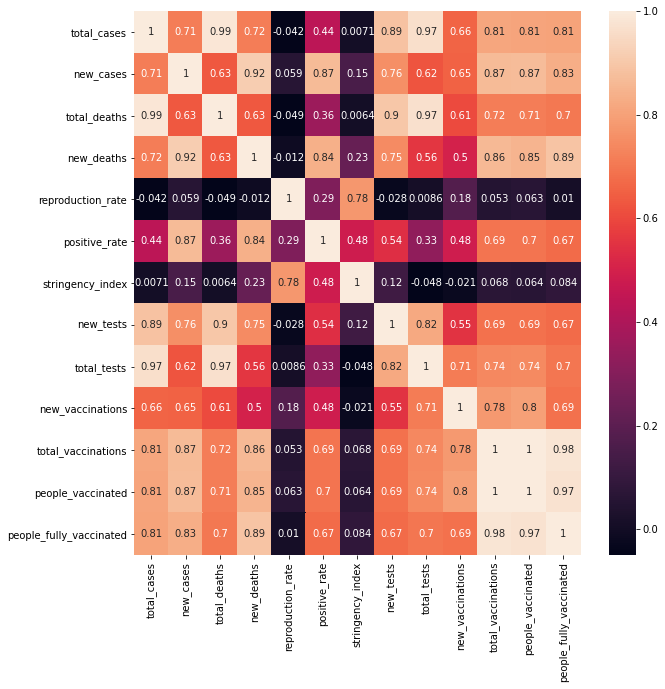

In [ ]:
plt.figure(figsize=(10,10))
df_india_filtered_corr = df_india_filtered.corr()
sns.heatmap(df_india_filtered_corr, annot=True)
plt.show()

Optimizing and selecting features for analysis

In [ ]:
df_dates = df_india_filtered.filter(items=['date'])
df_new_cases = df_india_filtered.filter(items=['new_cases'])
df_new_deaths = df_india_filtered.filter(items=['new_deaths'])

In [ ]:
# pca_input = df_india_filtered.filter(items=['reproduction_rate', 'positive_rate', 'stringency_index',
#                                            'new_tests', 
#                                            'new_vaccinations',
#                                            'people_vaccinated', 'people_fully_vaccinated'])
# pca_input

In [ ]:
# pca_input_norm = (pca_input-pca_input.mean())/pca_input.std()

In [ ]:
# pca_input_norm

In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components='mle', svd_solver='full')
# pca.fit(pca_input_norm)

In [ ]:
# pca_output = pd.DataFrame(pca.transform(pca_input_norm))

In [ ]:
# pca_output.columns=['a','b','c','d','e','f']

In [ ]:
# pca_output

In [ ]:
# plt.plot(df_new_cases_norm, 'k')
# plt.plot(df_new_deaths_norm, 'k')

# plt.plot(pca_output['a'], 'b')
# plt.plot(pca_output['b'], 'g')
# plt.plot(pca_output['c'], 'r')
# plt.plot(pca_output['d'], 'c')
# plt.plot(pca_output['e'], 'm')
# plt.plot(pca_output['f'], 'y')

# plt.show()

More data prep

In [ ]:
dataset_cases = df_india_filtered.filter(items=['new_cases',
                                          'reproduction_rate', 'positive_rate', 'stringency_index',
                                          'new_tests', 
                                          'new_vaccinations',
                                          'people_vaccinated', 'people_fully_vaccinated'])

cols = list(dataset_cases)[0:8]

print('Training set shape == {}'.format(dataset_cases.shape))
print('All Time Stamps == {}'.format(len(df_dates)))
print('Features Selected == {}'.format(cols))

Training set shape == (488, 8)
All Time Stamps == 488
Features Selected == ['new_cases', 'reproduction_rate', 'positive_rate', 'stringency_index', 'new_tests', 'new_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']


In [ ]:
training_set_cases = dataset_cases.to_numpy()
print('Shape of training set == {}'.format(training_set_cases.shape))
training_set_cases

Shape of training set == (488, 8)


array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.65553000e+05, 7.60000000e-01, 9.30000000e-02, ...,
        3.92215100e+06, 1.64158704e+08, 4.29302490e+07],
       [1.52734000e+05, 7.60000000e-01, 8.90000000e-02, ...,
        1.57617000e+06, 1.65598013e+08, 4.30671100e+07],
       [1.27510000e+05, 7.60000000e-01, 8.60000000e-02, ...,
        1.78477200e+06, 1.67191085e+08, 4.32588100e+07]])

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
training_set_cases_scaled = sc.fit_transform(training_set_cases)

sc_predict = StandardScaler()
sc_predict.fit_transform(training_set_cases[:,0:1])

In [ ]:
x_train_cases = []
y_train_cases = []

n_future = 10
n_past = 15

for i in range(n_past, len(training_set_cases_scaled) - n_future + 1):
  x_train_cases.append(training_set_cases_scaled[i-n_past:i, 1:dataset_cases.shape[1]])
  y_train_cases.append(training_set_cases_scaled[i+n_future-1:i+n_future, 0])
  
x_train_cases, y_train_cases = np.array(x_train_cases), np.array(y_train_cases)

print('x_train shape == {}'.format(x_train_cases.shape))
print('y_train shape == {}'.format(y_train_cases.shape))

x_train shape == (464, 15, 7)
y_train shape == (464, 1)


LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional
from keras.layers import Dropout, Conv1D, MaxPooling1D, Flatten, RepeatVector
from keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(n_past, dataset_cases.shape[1]-1)))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.25))
model.add(Dense(units=16, activation='linear'))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=["accuracy"])

Training

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 15, 128)           69632     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                1040      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 120,097
Trainable params: 120,097
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
# es = EarlyStopping(monitor = "loss", mode = "min", patience = 7)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

In [ ]:
history = model.fit(x_train_cases, y_train_cases, shuffle=True, epochs=100, callbacks=[rlr, mcp, tb], validation_split=0.1, verbose=1, batch_size=256)

Epoch 1/100
2/2 [==============================] - 23s 3s/step - loss: 0.2149 - accuracy: 0.0000e+00 - val_loss: 6.5547 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss improved from inf to 6.55468, saving model to weights.h5
Epoch 2/100
2/2 [==============================] - 0s 137ms/step - loss: 0.0673 - accuracy: 0.0000e+00 - val_loss: 4.6379 - val_accuracy: 0.0000e+00

Epoch 00002: val_loss improved from 6.55468 to 4.63790, saving model to weights.h5
Epoch 3/100
2/2 [==============================] - 0s 123ms/step - loss: 0.0644 - accuracy: 0.0000e+00 - val_loss: 3.7503 - val_accuracy: 0.0000e+00

Epoch 00003: val_loss improved from 4.63790 to 3.75034, saving model to weights.h5
Epoch 4/100
2/2 [==============================] - 0s 127ms/step - loss: 0.0535 - accuracy: 0.0000e+00 - val_loss: 3.3997 - val_accuracy: 0.0000e+00

Epoch 00004: val_loss improved from 3.75034 to 3.39967, saving model to weights.h5
Epoch 5/100
2/2 [==============================] - 0s 118ms/step - loss: 0

Future Predictions

In [ ]:
df_dates_future = pd.date_range(df_dates['date'].iloc[-1], periods=n_future, freq='1d').tolist()

df_dates_future_ = []
for this_timestamp in df_dates_future:
  df_dates_future_.append(this_timestamp.date())

In [ ]:
predictions_future_cases = model.predict(x_train_cases[-n_future:])

predictions_train_cases = model.predict(x_train_cases[n_past:])

In [ ]:
y_pred_future_cases = sc_predict.inverse_transform(predictions_future_cases)
y_pred_train_cases = sc_predict.inverse_transform(predictions_train_cases)

PREDICTIONS_FUTURE_CASES = pd.DataFrame(y_pred_future_cases, columns=['new_cases']).set_index(pd.Series(df_dates_future))

PREDICTIONS_TRAIN_CASES = pd.DataFrame(y_pred_train_cases, columns=['new_cases']).set_index(pd.Series(df_dates['date'].iloc[2*n_past + n_future - 1:]))

PREDICTIONS_FUTURE_CASES.head()

,new_cases
2021-05-31,386208.5000
2021-06-01,385433.6250
2021-06-02,383971.3125
2021-06-03,382266.8750
2021-06-04,379847.5000


In [ ]:
def datetime_to_timestamp(x):
  return datetime.strptime(x.strftime('%y%m%d'), '%y%m%d')

PREDICTIONS_TRAIN_CASES.index = PREDICTIONS_TRAIN_CASES.index.to_series().apply(datetime_to_timestamp)

Visualize

In [ ]:
dataset_cases['date'] = df_dates
dataset_cases = dataset_cases.set_index('date')

In [ ]:
dataset_cases

,new_cases,reproduction_rate,positive_rate,stringency_index,new_tests,new_vaccinations,people_vaccinated,people_fully_vaccinated
date,,,,,,,,
2020-01-30,1.0,0.00,0.000,10.19,0.0,0.0,0.0,0.0
2020-01-31,0.0,0.00,0.000,10.19,0.0,0.0,0.0,0.0
2020-02-01,0.0,0.00,0.000,10.19,0.0,0.0,0.0,0.0
2020-02-02,1.0,0.00,0.000,10.19,0.0,0.0,0.0,0.0
2020-02-03,1.0,0.00,0.000,10.19,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2021-05-27,186364.0,0.77,0.104,81.94,2157857.0,2777551.0,158783606.0,42419560.0
2021-05-28,173790.0,0.77,0.098,81.94,2070508.0,1963636.0,160605562.0,42561240.0
2021-05-29,165553.0,0.76,0.093,81.94,2080048.0,3922151.0,164158704.0,42930249.0


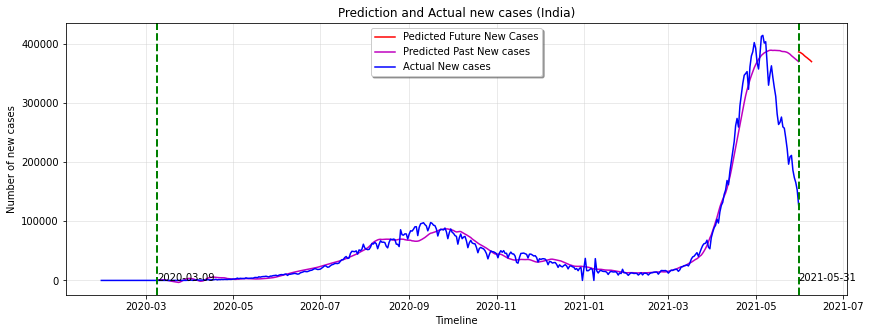

In [ ]:
plt.figure(figsize=(14,5))

START_DATE_FOR_PLOTTING = '2020-01-30'

plt.plot(PREDICTIONS_FUTURE_CASES.index, PREDICTIONS_FUTURE_CASES['new_cases'], color='r', label='Pedicted Future New Cases')
plt.plot(PREDICTIONS_TRAIN_CASES.loc[START_DATE_FOR_PLOTTING:].index, PREDICTIONS_TRAIN_CASES.loc[START_DATE_FOR_PLOTTING:]['new_cases'], color='m', label='Predicted Past New cases')
plt.plot(dataset_cases.loc[START_DATE_FOR_PLOTTING:].index, dataset_cases.loc[START_DATE_FOR_PLOTTING:]['new_cases'], color='b', label='Actual New cases')

plt.axvline(x=min(PREDICTIONS_FUTURE_CASES.index), color='g', linewidth=2, linestyle='--')
plt.axvline(x=min(PREDICTIONS_TRAIN_CASES.index), color='g', linewidth=2, linestyle='--')

plt.annotate("{}".format(min(PREDICTIONS_TRAIN_CASES.index).date()), (min(PREDICTIONS_TRAIN_CASES.index), 0))
plt.annotate("{}".format(max(PREDICTIONS_TRAIN_CASES.index).date()), (max(PREDICTIONS_TRAIN_CASES.index), 0))

plt.grid(which='major', color='#cccccc', alpha=0.5)
plt.legend(shadow=True)

plt.title('Prediction and Actual new cases (India)', fontsize=12)
plt.xlabel('Timeline', fontsize=10)
plt.ylabel('Number of new cases', fontsize=10)

plt.show()

In [ ]:
start = min(PREDICTIONS_TRAIN_CASES.index)
end = max(PREDICTIONS_TRAIN_CASES.index)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
mse_cases = mean_squared_error(dataset_cases.loc[start:end]['new_cases'], PREDICTIONS_TRAIN_CASES[:])
rmse_cases = math.sqrt(mse_cases)

mae_cases = mean_absolute_error(dataset_cases.loc[start:end]['new_cases'], PREDICTIONS_TRAIN_CASES[:])
rmae_cases = math.sqrt(mae_cases)

In [ ]:
rmse_cases, rmae_cases

(33874.099229241176, 111.25452250389024)